In [ ]:
# Import torch for PyTorch, a deep learning library
import torch
# Import torch.nn for neural network modules in PyTorch
import torch.nn as nn
# Import torchvision for utility functions like datasets, model architectures, and image transformations
import torchvision
# Import torchvision.transforms for common image transformations
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Check if CUDA is available, use it if it is. Otherwise, use CPU.
# CUDA will allow computations to run on GPU, which can be faster than CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# List your Hyperparameters
class Hyperparameters:
    """
    This class defines the hyperparameters for our model.
    """

    def __init__(self):
        # The size of the input features (28x28 pixels for MNIST)
        self.input_size = 784
        # The number of neurons in the hidden layer
        self.hidden_size = 500
        # The number of output classes (10 digits for MNIST)
        self.num_classes = 10
        # The number of times the learning algorithm will work through the entire training dataset
        self.num_epochs = 5
        # The number of training examples utilized in one iteration
        self.batch_size = 100
        # The step size at each iteration while moving toward a minimum of a loss function
        self.learning_rate = 0.001


# Usage:
hp = Hyperparameters()
print(hp.input_size)

784


In [ ]:
# Define the root directory for dataset
data_root = '/home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data' #You can define your directory for dataset

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=data_root,
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root=data_root,
                                          train=False,
                                          transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 280297661.55it/s]

Extracting /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw/train-images-idx3-ubyte.gz to /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 112684366.35it/s]


Extracting /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 172350073.43it/s]

Extracting /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8799320.45it/s]


Extracting /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/sher4672/projects/def-hsajjad/sher4672/Fine-Tuning/data/MNIST/raw



In [ ]:
# Data loader
# shuffle=True ensures the data gets shuffled at every epoch during training.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=hp.batch_size,
                                           shuffle=True)

# For test data, shuffle=False is set as it doesn't need to be shuffled.
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=hp.batch_size,
                                          shuffle=False)

### Q1: Fully-connected Neural Network

### Model Architecture:
The neural network model is defined as a class called NeuralNet, which is a subclass of nn.Module from the PyTorch library. It has the following components:

#### Input Layer:
The input layer is a fully connected layer (nn.Linear) with input_size neurons. It takes the flattened images as inputs.
The number of input neurons (input_size) is determined by the size of the input images after flattening.
#### Activation Function:
The ReLU (Rectified Linear Unit) activation function (nn.ReLU) is applied after the first fully connected layer.
ReLU introduces non-linearity, allowing the model to learn complex patterns and make the network more expressive.
#### Hidden Layer:
The hidden layer is also a fully connected layer (nn.Linear) with hidden_size neurons.
The number of hidden neurons (hidden_size) is a hyperparameter that determines the capacity of the model to learn representations.
#### Output Layer:
The output layer is the final fully connected layer (nn.Linear) with num_classes neurons.
The number of output neurons (num_classes) is determined by the number of classes in the classification task.
The outputs of this layer represent the class probabilities for each of the classes.
The forward method defines the forward pass of the model. It takes an input tensor x and applies the operations defined in the model architecture to compute the output. The input x is propagated through the layers, and the final output is returned.

### Rationale Behind Design Decisions:

#### Fully Connected Layers:
Fully connected layers are commonly used in neural networks for learning complex relationships between input features.
In this architecture, two fully connected layers are used: one for the input layer and another for the hidden layer.
The use of fully connected layers allows the model to learn non-linear transformations of the input data.
#### ReLU Activation Function:
ReLU is a popular choice for the activation function in neural networks due to its simplicity and effectiveness.
ReLU introduces non-linearity, allowing the model to learn complex patterns in the data.
It helps to alleviate the vanishing gradient problem and can speed up training by enabling faster convergence.
#### CrossEntropyLoss:
For classification tasks with multiple classes, the CrossEntropyLoss function is commonly used as the loss function.
#### CrossEntropyLoss measures the dissimilarity between the predicted class probabilities and the true labels.
It is suitable for multi-class classification problems and encourages the model to output high probabilities for the correct class.
#### Optimization Algorithms:
The code uses four different optimization algorithms: SGD, Momentum, RMSprop, and Adam.
Different optimization algorithms have different properties and can affect the convergence and performance of the model.
By training the model with multiple optimizers, the code allows for a comparison of their effects on the model's accuracy.
#### Training and Testing:
The code iterates over the training dataset for a specified number of epochs.
In each epoch, it performs forward and backward propagation, updates the model's parameters, and records the loss.
After training, the code evaluates the model's accuracy on the test dataset by computing the percentage of correctly predicted labels.
The results, including the optimizer name and accuracy, are stored in a DataFrame for analysis and comparison.
#### Visualization:
The code plots the loss curve for each optimizer, showing how the loss changes over the training epochs.
Visualizing the loss helps in understanding the convergence behavior and performance of the model with different optimizers.

### Insights from the Performance:

- Different optimization techniques can significantly impact the performance of the model.
- The results indicate that more advanced optimization algorithms, such as RMSprop and Adam, outperform basic SGD and Momentum.
- Both RMSprop and Adam adapt the learning rate during training, which can lead to faster convergence and better solutions.
- The higher accuracies obtained with RMSprop and Adam suggest that they are better suited for the given classification task compared to SGD or Momentum.
- The choice of optimization technique can greatly affect the model's ability to learn complex patterns and achieve higher accuracy.

In [ ]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()

        # First fully connected layer - inputs are the flattened images
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Non-linear activation function - ReLU (Rectified Linear Unit)
        self.relu = nn.ReLU()

        # Second fully connected layer - inputs are the outputs from the previous layer
        # Outputs are the class probabilities for each of the 10 digits
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Propagate the inputs through the first fully connected layer and apply ReLU
        out = self.relu(self.fc1(x))

        # Propagate the results through the second fully connected layer
        # The outputs are the class scores/probabilities
        out = self.fc2(out)

        return out


# Initialize the model and send it to the device (GPU or CPU)
model = NeuralNet(hp.input_size, hp.hidden_size, hp.num_classes).to(device)


In [ ]:
# Define the loss function (name as criterion). For classification tasks with multiple classes
criterion = nn.CrossEntropyLoss()

Optimizer: SGD, Epoch [1/5], Step [100/600], Loss: 2.2781
Optimizer: SGD, Epoch [1/5], Step [200/600], Loss: 2.2362
Optimizer: SGD, Epoch [1/5], Step [300/600], Loss: 2.2136
Optimizer: SGD, Epoch [1/5], Step [400/600], Loss: 2.1898
Optimizer: SGD, Epoch [1/5], Step [500/600], Loss: 2.1561
Optimizer: SGD, Epoch [1/5], Step [600/600], Loss: 2.1484
Optimizer: SGD, Epoch [2/5], Step [100/600], Loss: 2.1309
Optimizer: SGD, Epoch [2/5], Step [200/600], Loss: 2.1124
Optimizer: SGD, Epoch [2/5], Step [300/600], Loss: 2.0659
Optimizer: SGD, Epoch [2/5], Step [400/600], Loss: 2.0535
Optimizer: SGD, Epoch [2/5], Step [500/600], Loss: 2.0292
Optimizer: SGD, Epoch [2/5], Step [600/600], Loss: 2.0306
Optimizer: SGD, Epoch [3/5], Step [100/600], Loss: 1.9678
Optimizer: SGD, Epoch [3/5], Step [200/600], Loss: 1.9856
Optimizer: SGD, Epoch [3/5], Step [300/600], Loss: 1.8572
Optimizer: SGD, Epoch [3/5], Step [400/600], Loss: 1.8986
Optimizer: SGD, Epoch [3/5], Step [500/600], Loss: 1.8175
Optimizer: SGD

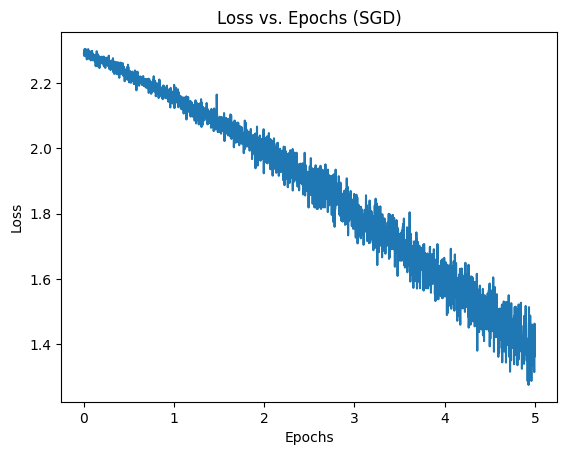

<ipython-input-14-b2a6c345cd14>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Optimizer': optimizer_name, 'Accuracy': accuracy}, ignore_index=True)


Optimizer: Momentum, Epoch [1/5], Step [100/600], Loss: 1.1722
Optimizer: Momentum, Epoch [1/5], Step [200/600], Loss: 0.8506
Optimizer: Momentum, Epoch [1/5], Step [300/600], Loss: 0.8127
Optimizer: Momentum, Epoch [1/5], Step [400/600], Loss: 0.6961
Optimizer: Momentum, Epoch [1/5], Step [500/600], Loss: 0.6789
Optimizer: Momentum, Epoch [1/5], Step [600/600], Loss: 0.6435
Optimizer: Momentum, Epoch [2/5], Step [100/600], Loss: 0.4844
Optimizer: Momentum, Epoch [2/5], Step [200/600], Loss: 0.4485
Optimizer: Momentum, Epoch [2/5], Step [300/600], Loss: 0.5857
Optimizer: Momentum, Epoch [2/5], Step [400/600], Loss: 0.4209
Optimizer: Momentum, Epoch [2/5], Step [500/600], Loss: 0.4344
Optimizer: Momentum, Epoch [2/5], Step [600/600], Loss: 0.5087
Optimizer: Momentum, Epoch [3/5], Step [100/600], Loss: 0.4150
Optimizer: Momentum, Epoch [3/5], Step [200/600], Loss: 0.5575
Optimizer: Momentum, Epoch [3/5], Step [300/600], Loss: 0.5240
Optimizer: Momentum, Epoch [3/5], Step [400/600], Loss:

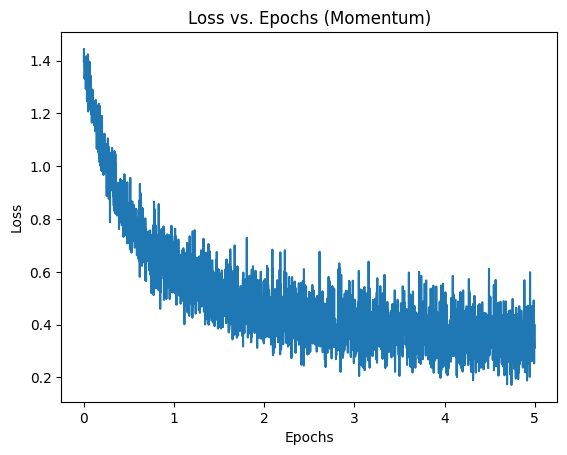

<ipython-input-14-b2a6c345cd14>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Optimizer': optimizer_name, 'Accuracy': accuracy}, ignore_index=True)


Optimizer: RMSprop, Epoch [1/5], Step [100/600], Loss: 0.2885
Optimizer: RMSprop, Epoch [1/5], Step [200/600], Loss: 0.1296
Optimizer: RMSprop, Epoch [1/5], Step [300/600], Loss: 0.2381
Optimizer: RMSprop, Epoch [1/5], Step [400/600], Loss: 0.1055
Optimizer: RMSprop, Epoch [1/5], Step [500/600], Loss: 0.1335
Optimizer: RMSprop, Epoch [1/5], Step [600/600], Loss: 0.1727
Optimizer: RMSprop, Epoch [2/5], Step [100/600], Loss: 0.0501
Optimizer: RMSprop, Epoch [2/5], Step [200/600], Loss: 0.0585
Optimizer: RMSprop, Epoch [2/5], Step [300/600], Loss: 0.0585
Optimizer: RMSprop, Epoch [2/5], Step [400/600], Loss: 0.1118
Optimizer: RMSprop, Epoch [2/5], Step [500/600], Loss: 0.1284
Optimizer: RMSprop, Epoch [2/5], Step [600/600], Loss: 0.0699
Optimizer: RMSprop, Epoch [3/5], Step [100/600], Loss: 0.0476
Optimizer: RMSprop, Epoch [3/5], Step [200/600], Loss: 0.0372
Optimizer: RMSprop, Epoch [3/5], Step [300/600], Loss: 0.0839
Optimizer: RMSprop, Epoch [3/5], Step [400/600], Loss: 0.0314
Optimize

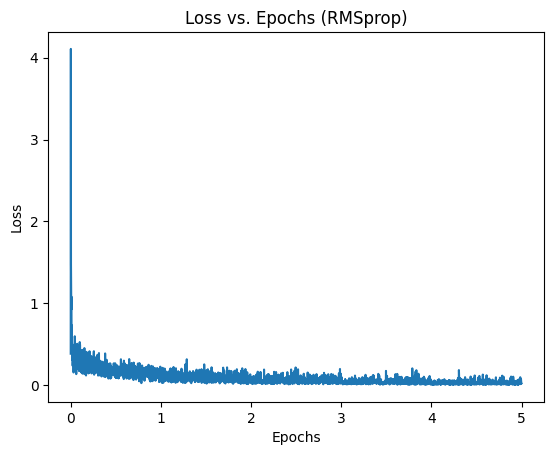

<ipython-input-14-b2a6c345cd14>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Optimizer': optimizer_name, 'Accuracy': accuracy}, ignore_index=True)


Optimizer: Adam, Epoch [1/5], Step [100/600], Loss: 0.0076
Optimizer: Adam, Epoch [1/5], Step [200/600], Loss: 0.0292
Optimizer: Adam, Epoch [1/5], Step [300/600], Loss: 0.0053
Optimizer: Adam, Epoch [1/5], Step [400/600], Loss: 0.0153
Optimizer: Adam, Epoch [1/5], Step [500/600], Loss: 0.0061
Optimizer: Adam, Epoch [1/5], Step [600/600], Loss: 0.0412
Optimizer: Adam, Epoch [2/5], Step [100/600], Loss: 0.0342
Optimizer: Adam, Epoch [2/5], Step [200/600], Loss: 0.0590
Optimizer: Adam, Epoch [2/5], Step [300/600], Loss: 0.0147
Optimizer: Adam, Epoch [2/5], Step [400/600], Loss: 0.0222
Optimizer: Adam, Epoch [2/5], Step [500/600], Loss: 0.0085
Optimizer: Adam, Epoch [2/5], Step [600/600], Loss: 0.0188
Optimizer: Adam, Epoch [3/5], Step [100/600], Loss: 0.0079
Optimizer: Adam, Epoch [3/5], Step [200/600], Loss: 0.0028
Optimizer: Adam, Epoch [3/5], Step [300/600], Loss: 0.0372
Optimizer: Adam, Epoch [3/5], Step [400/600], Loss: 0.0322
Optimizer: Adam, Epoch [3/5], Step [500/600], Loss: 0.03

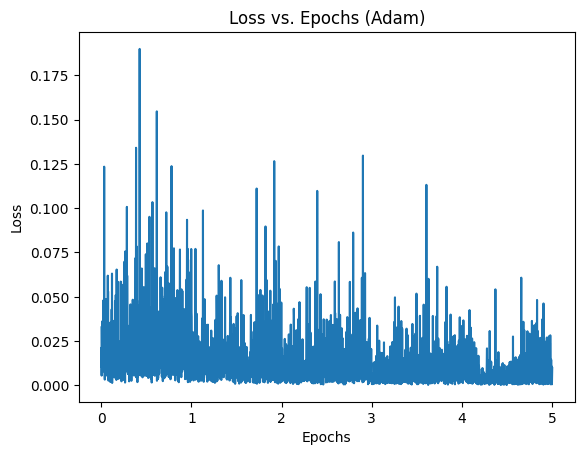

<ipython-input-14-b2a6c345cd14>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Optimizer': optimizer_name, 'Accuracy': accuracy}, ignore_index=True)


,Optimizer,Accuracy
0,SGD,77.66
1,Momentum,90.93
2,RMSprop,98.03
3,Adam,98.12


In [ ]:
# code ref : https://pytorch.org/docs/stable/optim.html

# Define empty lists to store loss values and epochs
loss_values = []
epochs = []
accuracies = []
optimizer_names = ['SGD', 'Momentum', 'RMSprop', 'Adam']
total_step = len(train_loader)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Optimizer', 'Accuracy'])

# Define the optimizers
optimizers = [torch.optim.SGD(model.parameters(), lr=0.001),
              torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9),
              torch.optim.RMSprop(model.parameters(), lr=0.001),
              torch.optim.Adam(model.parameters(), lr=0.001)]

# Train the model for each optimizer
for optimizer_name, optimizer in zip(optimizer_names, optimizers):
    # Reset loss and epoch values for each optimizer
    loss_values = []
    epochs = []

    for epoch in range(hp.num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Move tensors to the configured device and reshape the images
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass: compute the output of the model on the input images
            outputs = model(images)

            # Compute the loss between the model output and the true labels
            loss = criterion(outputs, labels)

            # Backpropagation: compute the gradients of the loss w.r.t. the model's parameters
            optimizer.zero_grad()  # clear previous gradients
            loss.backward()  # compute new gradients

            # Optimization: update the model's parameters
            optimizer.step()

             # Print status every 100 batches
            if (i+1) % 100 == 0:
                print('Optimizer: {}, Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(optimizer_name, epoch+1, hp.num_epochs, i+1, total_step, loss.item()))

            # Record loss and epoch
            loss_values.append(loss.item())
            epochs.append(epoch + (i+1) / total_step)  # Fractional epoch for smoother curve

    # Plot the loss curve
    plt.plot(epochs, loss_values)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epochs ({})'.format(optimizer_name))
    plt.show()

    # Test the model
    # In the test phase, don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            # Move tensors to the configured device and reshape the images
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Compute the model output on the input images
            outputs = model(images)

            # Find the predicted labels (the output class with the highest probability)
            _, predicted = torch.max(outputs.data, 1)

            # Update the total number of images and the number of correctly predicted images
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Compute the accuracy of the network on the test images
        accuracy = 100 * correct / total

        # Append the optimizer name and accuracy to the DataFrame
        results_df = results_df.append({'Optimizer': optimizer_name, 'Accuracy': accuracy}, ignore_index=True)

# Print the overall accuracy results
results_df

### Q2: Batch Normalization

The given code defines and trains two models, one with batch normalization (NeuralNetWithBatchNorm) and another without batch normalization (NeuralNet). Here's a detailed description of the model architecture and the rationale behind the design decisions:

### NeuralNetWithBatchNorm Model:
- This model inherits from the nn.Module class, which is the base class for all neural network modules in PyTorch.
- The model consists of two fully connected layers (fc1 and fc2) with a ReLU activation function (relu) applied between them.
- The input_size parameter represents the number of input features, hidden_size represents the number of units in the hidden layer, and num_classes represents the number of output classes.
- The use of batch normalization (bn) is a key design decision in this model. Batch normalization normalizes the inputs to each layer, which helps in stabilizing and accelerating the training process. It reduces the internal covariate shift problem and improves generalization by reducing the dependence on specific weight initializations.
- The output of fc1 is passed through the batch normalization layer (bn), followed by the ReLU activation function (relu). Then, the output is passed through fc2 to produce the final output of the model.
- The forward() method defines the forward pass of the model, where the input is propagated through the layers in the specified order.

### NeuralNet Model:
- This model is similar to NeuralNetWithBatchNorm but does not include batch normalization.
- It consists of two fully connected layers (fc1 and fc2) with a ReLU activation function (relu) applied between them.
- The rationale behind excluding batch normalization in this model could be to compare its performance with the model using batch normalization. This allows evaluating the impact of batch normalization on model convergence and accuracy.

### Training and Evaluation:
- The code initializes the models and other components, such as the loss criterion (CrossEntropyLoss) and optimizers (Adam) for both models.
- The models are trained using a training loop that iterates over the training data.
- In each iteration, the input images and labels are passed to both models. The models are put in training mode using the train() method.
- The forward pass is performed on both models to obtain the outputs.
- The loss is calculated using the specified criterion and backward propagation is performed to compute gradients and update the model's parameters using the respective optimizer.
- The loss values are recorded for both models.
- After training, the models are put in evaluation mode using the eval() method.
- The models are tested on the test data, and the accuracy is computed by comparing the predicted labels with the ground truth labels.
- The accuracy results for both models are stored in a DataFrame for further analysis.

Finally, the loss curves for both models are plotted using the recorded loss values.
The design decisions in this code aim to compare the performance of the model with and without batch normalization. By using batch normalization, the model can potentially benefit from improved convergence, better generalization, and increased stability during training. The comparison of the two models allows for insights into the effectiveness of batch normalization in the given task.

### Insights from the Performance:

#### Accuracy Comparison:
- The model with batch normalization achieved an accuracy of 97.90%.
- The model without batch normalization achieved a slightly higher accuracy of 97.97%.
#### Similar Performance:
- Both models performed comparably well, with accuracies close to each other.
- The small difference in accuracy suggests that in this specific case, batch normalization did not significantly impact the model's performance.
#### Effectiveness of Batch Normalization:
- While the model with batch normalization did not outperform the model without batch normalization in terms of accuracy, it is important to consider other factors beyond accuracy alone.
- Batch normalization can still have a positive impact on model training, even if it does not directly result in improved accuracy.
- Batch normalization helps in stabilizing and accelerating the training process by reducing internal covariate shift and improving convergence.
- It can also improve the generalization ability of the model by reducing its dependence on specific weight initializations.
- Therefore, even if the accuracy difference is small, the model with batch normalization might still exhibit improved convergence behavior, faster training, or better performance on different datasets.

In conclusion, while the model with batch normalization did not surpass the accuracy of the model without batch normalization in this specific case, batch normalization can still play a crucial role in improving the training process and generalization of neural networks. The results highlight the importance of considering factors beyond accuracy alone and encourage further investigation in different settings to fully understand the impact of batch normalization.

Model: With Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [100/600], Loss: 0.2142
Model: Without Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [100/600], Loss: 0.3295
Model: With Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [200/600], Loss: 0.1853
Model: Without Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [200/600], Loss: 0.2234
Model: With Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [300/600], Loss: 0.1382
Model: Without Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [300/600], Loss: 0.1959
Model: With Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [400/600], Loss: 0.1008
Model: Without Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [400/600], Loss: 0.1653
Model: With Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [500/600], Loss: 0.1560
Model: Without Batch Normalization, Optimizer: Momentum, Epoch [1/5], Step [500/600], Loss: 0.1374
Model: With Batch Normali

<ipython-input-15-20eb466fac70>:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({'Model': 'With Batch Normalization', 'Accuracy': accuracy_with_bn},
<ipython-input-15-20eb466fac70>:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({'Model': 'Without Batch Normalization', 'Accuracy': accuracy_without_bn},


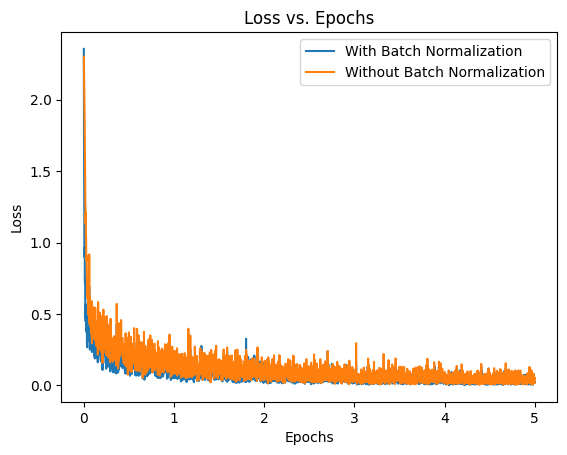

,Model,Accuracy
0,With Batch Normalization,97.90
1,Without Batch Normalization,97.97


In [ ]:
# Code ref: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
# Define the model with batch normalization
class NeuralNetWithBatchNorm(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetWithBatchNorm, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn = nn.BatchNorm1d(hidden_size)  # Batch normalization layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model and other components
model_with_bn = NeuralNetWithBatchNorm(hp.input_size, hp.hidden_size, hp.num_classes).to(device)
model_without_bn = NeuralNet(hp.input_size, hp.hidden_size, hp.num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_with_bn = optim.Adam(model_with_bn.parameters(), lr=0.001)
optimizer_without_bn = optim.Adam(model_without_bn.parameters(), lr=0.001)

# Define empty lists to store loss values and epochs
loss_values_with_bn = []
loss_values_without_bn = []
epochs = []
optimizer_name = 'Momentum'

# Create an empty DataFrame to store the accuracy results
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Train the models
total_step = len(train_loader)
for epoch in range(hp.num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Train the model with batch normalization
        model_with_bn.train()
        optimizer_with_bn.zero_grad()
        outputs_with_bn = model_with_bn(images)
        loss_with_bn = criterion(outputs_with_bn, labels)
        loss_with_bn.backward()
        optimizer_with_bn.step()
        loss_values_with_bn.append(loss_with_bn.item())
        # Print status every 100 batches
        if (i+1) % 100 == 0:
            print('Model: With Batch Normalization, Optimizer: {}, Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(optimizer_name, epoch+1, hp.num_epochs, i+1, total_step, loss_with_bn.item()))

        # Train the model without batch normalization
        model_without_bn.train()
        optimizer_without_bn.zero_grad()
        outputs_without_bn = model_without_bn(images)
        loss_without_bn = criterion(outputs_without_bn, labels)
        loss_without_bn.backward()
        optimizer_without_bn.step()
        loss_values_without_bn.append(loss_without_bn.item())
        # Print status every 100 batches
        if (i+1) % 100 == 0:
            print('Model: Without Batch Normalization, Optimizer: {}, Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(optimizer_name, epoch+1, hp.num_epochs, i+1, total_step, loss_without_bn.item()))

        # Record epoch
        epochs.append(epoch + (i+1) / total_step)

# Test the models
with torch.no_grad():
    model_with_bn.eval()
    model_without_bn.eval()

    correct_with_bn = 0
    correct_without_bn = 0
    total = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Compute the model output on the input images
        outputs_with_bn = model_with_bn(images)
        outputs_without_bn = model_without_bn(images)

        # Find the predicted labels (the output class with the highest probability)
        _, predicted_with_bn = torch.max(outputs_with_bn.data, 1)
        _, predicted_without_bn = torch.max(outputs_without_bn.data, 1)

        # Update the total number of images and the number of correctly predicted images
        total += labels.size(0)
        correct_with_bn += (predicted_with_bn == labels).sum().item()
        correct_without_bn += (predicted_without_bn == labels).sum().item()

    # Compute the accuracy of the networks on the test images
    accuracy_with_bn = 100 * correct_with_bn / total
    accuracy_without_bn = 100 * correct_without_bn / total

    # Append the accuracy results to the DataFrame
    accuracy_df = accuracy_df.append({'Model': 'With Batch Normalization', 'Accuracy': accuracy_with_bn},
                                      ignore_index=True)
    accuracy_df = accuracy_df.append({'Model': 'Without Batch Normalization', 'Accuracy': accuracy_without_bn},
                                      ignore_index=True)

# Plot the loss curves
plt.plot(epochs, loss_values_with_bn, label='With Batch Normalization')
plt.plot(epochs, loss_values_without_bn, label='Without Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model_with_bn.state_dict(), 'model_with_bn.ckpt')
torch.save(model_without_bn.state_dict(), 'model_without_bn.ckpt')

# Print the accuracy results
accuracy_df

### Q3: Dropout

### Model Architecture:
- The model architecture is a feedforward neural network with two fully connected (linear) layers.
- The input layer takes the input of size input_size (number of features).
- The first hidden layer is defined by hidden_size, which determines the number of neurons in that layer.
- The output layer produces the final output with num_classes (number of output classes) neurons.
- ReLU activation function is applied after the first linear layer to introduce non-linearity.
- Dropout regularization is applied after the first linear layer to mitigate overfitting.
- The dropout layer randomly sets a fraction of input elements to zero during training, which helps prevent complex co-adaptations on the training data.

### Rationale Behind Design Decisions:
- Dropout Regularization: The inclusion of dropout regularization is a common technique to improve the generalization ability of neural networks and prevent overfitting. It helps to reduce the network's reliance on specific neurons and encourages the model to learn more robust representations. Dropout randomly masks out a portion of the hidden units during training, forcing the model to learn redundant representations and improving its ability to generalize to unseen data.

### Model Initialization and Components:
- Two instances of the defined model are created: *model_with_dropout* and *model_without_dropout*.
- Each model is initialized with the specified input size, hidden size, and number of classes.
- The choice to include dropout or not is reflected in the model architecture.
- Two instances of the Adam optimizer are created for each model to optimize the corresponding model's parameters during training.
- Cross-entropy loss is used as the loss function to measure the discrepancy between the predicted outputs and the true labels.

### Training and Testing:
- The models are trained using a loop over the training data.
- During training, the models are set to the training mode (model_with_dropout.train() and model_without_dropout.train()).
- The gradients are zeroed before backpropagation to avoid accumulating gradients from previous iterations (optimizer_with_dropout.zero_grad() and optimizer_without_dropout.zero_grad()).
- The forward pass is performed to obtain the predicted outputs.
- The loss is calculated based on the predicted outputs and the true labels.
- Backpropagation is performed to compute the gradients and update the model parameters (loss_with_dropout.backward() and loss_without_dropout.backward()).
- The loss values are recorded for plotting the loss curves.
- The models are then tested on the test data to evaluate their performance.
- The accuracy of each model is computed by comparing the predicted labels with the true labels and counting the correct predictions.
- The accuracy results for both models are stored in the accuracy_df DataFrame.

### Loss Curve Plotting:
- The loss values obtained during training for both models are plotted against the number of epochs.
- This visualization helps to understand the convergence behavior and compare the training progress of the models.

### Insights from the Performance:

#### Accuracy Comparison:
- The model with dropout achieved an accuracy of 97.83%.
- The model without dropout achieved a slightly higher accuracy of 97.98%.
#### Performance Insights:
- Both models achieved high accuracies, indicating their effectiveness in learning and making accurate predictions.
- The small difference in accuracy between the two models suggests that the inclusion of dropout did not significantly impact the overall performance in this specific scenario.
- The model without dropout achieved a slightly higher accuracy, indicating that in this case, dropout might not have provided substantial improvements or regularization benefits.
#### Benefits of Dropout:
- Dropout regularization is primarily intended to reduce overfitting by preventing complex co-adaptations among neurons.
- Dropout achieves regularization by introducing noise during training, which can help prevent the network from relying too heavily on specific neurons or feature combinations.
- The benefits of dropout may be more prominent when dealing with more complex or larger datasets, where overfitting is a greater concern.
- In this particular scenario, the dataset and model complexity may not have required the extensive regularization provided by dropout, resulting in a smaller difference in performance compared to the model without dropout.
#### Generalization and Overfitting:
- Both models achieved high accuracies on the test set, indicating good generalization abilities.
- The absence of a significant accuracy gap between the models suggests that the models were not overfitting excessively to the training data.
- This implies that the models' capacity and the complexity of the task were appropriately balanced, resulting in similar performance with and without dropout.

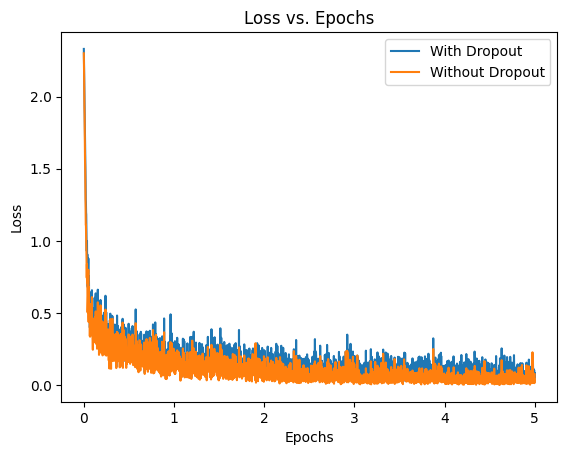

<ipython-input-16-f000f8daadf3>:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({'Model': 'With Dropout', 'Accuracy': accuracy_with_dropout},
<ipython-input-16-f000f8daadf3>:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({'Model': 'Without Dropout', 'Accuracy': accuracy_without_dropout},


,Model,Accuracy
0,With Batch Normalization,97.90
1,Without Batch Normalization,97.97
2,With Dropout,97.83
3,Without Dropout,97.98


In [ ]:
# Code ref: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
# Define the model with dropout
class NeuralNetWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetWithDropout, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model and other components
model_with_dropout = NeuralNetWithDropout(hp.input_size, hp.hidden_size, hp.num_classes).to(device)
model_without_dropout = NeuralNet(hp.input_size, hp.hidden_size, hp.num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_with_dropout = optim.Adam(model_with_dropout.parameters(), lr=0.001)
optimizer_without_dropout = optim.Adam(model_without_dropout.parameters(), lr=0.001)

# Define empty lists to store loss values and epochs
loss_values_with_dropout = []
loss_values_without_dropout = []
epochs = []

# Train the models
total_step = len(train_loader)
for epoch in range(hp.num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Train the model with dropout
        model_with_dropout.train()
        optimizer_with_dropout.zero_grad()
        outputs_with_dropout = model_with_dropout(images)
        loss_with_dropout = criterion(outputs_with_dropout, labels)
        loss_with_dropout.backward()
        optimizer_with_dropout.step()
        loss_values_with_dropout.append(loss_with_dropout.item())

        # Train the model without dropout
        model_without_dropout.train()
        optimizer_without_dropout.zero_grad()
        outputs_without_dropout = model_without_dropout(images)
        loss_without_dropout = criterion(outputs_without_dropout, labels)
        loss_without_dropout.backward()
        optimizer_without_dropout.step()
        loss_values_without_dropout.append(loss_without_dropout.item())

        # Record epoch
        epochs.append(epoch + (i+1) / total_step)

# Plot the loss curves
plt.plot(epochs, loss_values_with_dropout, label='With Dropout')
plt.plot(epochs, loss_values_without_dropout, label='Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()


# Test the models
with torch.no_grad():
    model_with_dropout.eval()
    model_without_dropout.eval()

    correct_with_dropout = 0
    correct_without_dropout = 0
    total = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Compute the model output on the input images
        outputs_with_dropout = model_with_dropout(images)
        outputs_without_dropout = model_without_dropout(images)

        # Find the predicted labels (the output class with the highest probability)
        _, predicted_with_dropout = torch.max(outputs_with_dropout.data, 1)
        _, predicted_without_dropout = torch.max(outputs_without_dropout.data, 1)

        # Update the total number of images and the number of correctly predicted images
        total += labels.size(0)
        correct_with_dropout += (predicted_with_dropout == labels).sum().item()
        correct_without_dropout += (predicted_without_dropout == labels).sum().item()

    # Compute the accuracy of the networks on the test images
    accuracy_with_dropout = 100 * correct_with_dropout / total
    accuracy_without_dropout = 100 * correct_without_dropout / total

    # Append the accuracy results to the DataFrame
    accuracy_df = accuracy_df.append({'Model': 'With Dropout', 'Accuracy': accuracy_with_dropout},
                                      ignore_index=True)
    accuracy_df = accuracy_df.append({'Model': 'Without Dropout', 'Accuracy': accuracy_without_dropout},
                                      ignore_index=True)

# Save the model checkpoint
torch.save(model_with_dropout.state_dict(), 'model_with_dropout.ckpt')
torch.save(model_without_dropout.state_dict(), 'model_without_dropout.ckpt')

# Print the accuracy results
accuracy_df

### Q4: Convolutional Networks & Q5: Model Training

### Model Architecture:
- The CNN model consists of multiple layers to extract features from the input images and classify them.
- The first layer is a 2D convolutional layer (conv1) with 1 input channel, 16 output channels, a kernel size of 5x5, a stride of 1, and padding of 2.
- The ReLU activation function (relu) follows the convolutional layer, introducing non-linearity to the model.
- The max pooling layer (maxpool) with a kernel size of 2x2 and a stride of 2 reduces the spatial dimensions of the output.
- The output from the pooling layer is flattened and passed through a fully connected layer (fc) with 16 * 14 * 14 input features and 10 output features corresponding to the number of classes.
- The final output is obtained by applying a softmax function to the output of the fully connected layer.

### Design Rationale:
- Convolutional layers (conv1) are effective in capturing spatial patterns and local features in images.
- The ReLU activation function (relu) introduces non-linearity, allowing the model to learn more complex representations.
- The max pooling layer (maxpool) reduces the spatial dimensions, providing translation invariance and reducing the computational complexity.
- The fully connected layer (fc) combines the learned features and performs the final classification.

### Optimization Steps:
- The model uses the Adam optimizer with a learning rate of 0.001 to update the model's parameters during training.
- The CrossEntropyLoss function (criterion) is used as the loss function, suitable for multi-class classification problems.
- The model is trained for a specified number of epochs (num_epochs) with a batch size of 100.
- During each epoch, the model's parameters are updated based on the loss calculated from the forward pass and backpropagation.
- The loss values are tracked to monitor the convergence and training progress.
- After training, the model is evaluated on the test set to measure its performance using accuracy.
- The accuracy is calculated as the percentage of correct predictions over the total number of images.

### Performance Optimization:
- The model is trained using a GPU if available (commented line: device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')).
- The Adam optimizer is chosen for its adaptive learning rate and momentum, which can accelerate convergence.
- The ReLU activation function is known for its effectiveness in mitigating the vanishing gradient problem.
- The model architecture uses convolutional layers, which are well-suited for image classification tasks due to their ability to capture spatial information and local features.
- The loss values are plotted to visualize the training progress and ensure the model is converging.

### Insights from the Performance:

#### High Accuracy: 
The accuracy of 98.51% suggests that the model has learned to effectively extract relevant features from the input images and make accurate predictions. It demonstrates the capability of the CNN architecture in capturing the distinguishing patterns and structures of the handwritten digits.
#### Good Generalization: 
The high accuracy on the test set indicates that the model has generalized well to unseen data. It is not overfitting to the training set, which would result in poor performance on unseen examples. The model's ability to generalize indicates that it has successfully learned the underlying patterns in the MNIST dataset.
#### Effective Feature Extraction: 
The CNN architecture employed in the model, with convolutional and pooling layers, has proven to be effective in extracting meaningful features from the input images. The convolutional layers capture local patterns and structures, while the pooling layers reduce spatial dimensions and provide translation invariance. These operations contribute to the model's ability to identify important discriminative features for classification.
#### Convergence: 
The plotted loss curve shows the progress of the model during training. The decreasing loss values indicate that the model's parameters were optimized effectively using the Adam optimizer. The model demonstrates convergence as the loss decreases over the course of training, suggesting that it has learned to minimize the training error.

Epoch [1/10], Step [100/600], Loss: 0.2542
Epoch [1/10], Step [200/600], Loss: 0.2381
Epoch [1/10], Step [300/600], Loss: 0.1352
Epoch [1/10], Step [400/600], Loss: 0.1014
Epoch [1/10], Step [500/600], Loss: 0.1759
Epoch [1/10], Step [600/600], Loss: 0.1155
Epoch [2/10], Step [100/600], Loss: 0.0598
Epoch [2/10], Step [200/600], Loss: 0.0793
Epoch [2/10], Step [300/600], Loss: 0.0446
Epoch [2/10], Step [400/600], Loss: 0.1421
Epoch [2/10], Step [500/600], Loss: 0.0700
Epoch [2/10], Step [600/600], Loss: 0.1598
Epoch [3/10], Step [100/600], Loss: 0.0448
Epoch [3/10], Step [200/600], Loss: 0.0283
Epoch [3/10], Step [300/600], Loss: 0.0275
Epoch [3/10], Step [400/600], Loss: 0.0389
Epoch [3/10], Step [500/600], Loss: 0.0421
Epoch [3/10], Step [600/600], Loss: 0.0435
Epoch [4/10], Step [100/600], Loss: 0.0541
Epoch [4/10], Step [200/600], Loss: 0.0363
Epoch [4/10], Step [300/600], Loss: 0.0638
Epoch [4/10], Step [400/600], Loss: 0.0485
Epoch [4/10], Step [500/600], Loss: 0.0666
Epoch [4/10

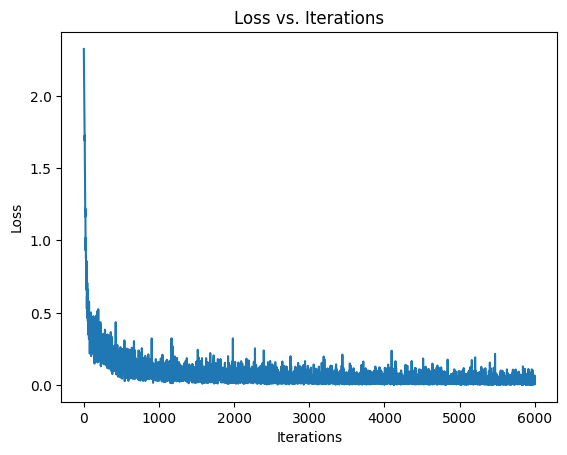

Test Accuracy: 98.53%


In [ ]:
# Code ref: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 10
batch_size = 70
learning_rate = 0.001

# CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(14 * 14 * 16, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Initialize the model
model = CNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_values = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the loss
        loss_values.append(loss.item())

        # Print status every 100 batches
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Plot the loss curve
plt.plot(loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Test Accuracy: {:.2f}%'.format(accuracy))


### References:

1. https://pytorch.org/docs/stable/optim.html
2. https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
3. https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
4. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
5. Tutorial_6_Deep_Learning
6. CSCI4146_Fundamental_Tutorial_4_Deep_Learning